In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

df = pd.read_csv(
    "https://raw.githubusercontent.com/alfianpr/BCG-virtual-experience/main/EDA%20and%20Data%20Cleaning/data.csv")


In [58]:
# Exploratory data analysis
df.head()


,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [60]:
cat_df = df.select_dtypes(include=["object"])
num_df = df.select_dtypes(exclude=["object"])
def printColumnTypes (non_numeric_df, numeric_df):
    print ("Non-numeric columns")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns")
    for col in numeric_df:
        print(f"{col}")

printColumnTypes(cat_df, num_df)

Non-numeric columns
id
activity_new
channel_sales
date_activ
date_end
date_first_activ
date_modif_prod
date_renewal
has_gas
origin_up

Numeric columns
campaign_disc_ele
cons_12m
cons_gas_12m
cons_last_month
forecast_base_bill_ele
forecast_base_bill_year
forecast_bill_12m
forecast_cons
forecast_cons_12m
forecast_cons_year
forecast_discount_energy
forecast_meter_rent_12m
forecast_price_energy_p1
forecast_price_energy_p2
forecast_price_pow_p1
imp_cons
margin_gross_pow_ele
margin_net_pow_ele
nb_prod_act
net_margin
num_years_antig
pow_max


## Handling missing value

In [61]:
#Column with missing value
df.isnull().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

In [62]:
#Percentage of missing
def perc_missing (df):
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0) :
            print('{} => {}%'.format(col, round(pct, 2)))

perc_missing(df)

activity_new => 59.3%
campaign_disc_ele => 100.0%
channel_sales => 26.21%
date_end => 0.01%
date_first_activ => 78.21%
date_modif_prod => 0.98%
date_renewal => 0.25%
forecast_base_bill_ele => 78.21%
forecast_base_bill_year => 78.21%
forecast_bill_12m => 78.21%
forecast_cons => 78.21%
forecast_discount_energy => 0.78%
forecast_price_energy_p1 => 0.78%
forecast_price_energy_p2 => 0.78%
forecast_price_pow_p1 => 0.78%
margin_gross_pow_ele => 0.08%
margin_net_pow_ele => 0.08%
net_margin => 0.09%
origin_up => 0.54%
pow_max => 0.02%


<AxesSubplot:>

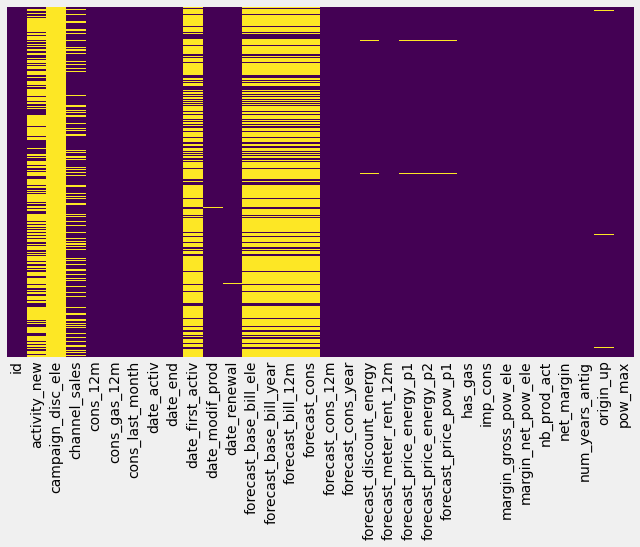

In [63]:
#Heatmap missing value
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)


In [65]:
#Droping feature (Columns that has so much missing value)

colsToDrop = ["activity_new", "campaign_disc_ele", "date_first_activ", "forecast_base_bill_ele", "forecast_base_bill_year",
                "forecast_bill_12m", "forecast_cons"]
df.drop(colsToDrop, axis=1, inplace=True)

perc_missing(df)

channel_sales => 26.21%
date_end => 0.01%
date_modif_prod => 0.98%
date_renewal => 0.25%
forecast_discount_energy => 0.78%
forecast_price_energy_p1 => 0.78%
forecast_price_energy_p2 => 0.78%
forecast_price_pow_p1 => 0.78%
margin_gross_pow_ele => 0.08%
margin_net_pow_ele => 0.08%
net_margin => 0.09%
origin_up => 0.54%
pow_max => 0.02%


In [80]:
#imputing
#Fill missing value with mean of the columns

for col in df.columns:
    df[col].bfill(inplace=True)

df["channel_sales"].ffill(inplace=True)

df.isnull().sum()

id                          0
channel_sales               0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_modif_prod             0
date_renewal                0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
origin_up                   0
pow_max                     0
dtype: int64